insert_sort:

https://www.geeksforgeeks.org/python-program-for-insertion-sort/

In [1]:
def insertionSort(arr): 
  
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
  
        key = arr[i] 
  
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >=0 and key < arr[j] : 
                arr[j+1] = arr[j] 
                j -= 1
        arr[j+1] = key 

merge sort:

https://www.educative.io/edpresso/merge-sort-in-python

In [3]:
def MergeSort(myList):
    if len(myList) > 1:
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]

        # Recursive call on each half
        MergeSort(left)
        MergeSort(right)

        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
              # The value from the left half has been used
              myList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            myList[k]=right[j]
            j += 1
            k += 1

randomized quick sort:

https://www.codementor.io/@garethdwyer/quicksort-tutorial-python-implementation-with-line-by-line-explanation-p9h7jd3r6

In [4]:
def partition(xs, start, end):
    follower = leader = start
    while leader < end:
        if xs[leader] <= xs[end]:
            xs[follower], xs[leader] = xs[leader], xs[follower]
            follower += 1
        leader += 1
    xs[follower], xs[end] = xs[end], xs[follower]
    return follower

def _quicksort(xs, start, end):
    if start >= end:
        return
    p = partition(xs, start, end)
    _quicksort(xs, start, p-1)
    _quicksort(xs, p+1, end)
    
def quicksort(xs):
    _quicksort(xs, 0, len(xs)-1)

counting sort:

https://en.wikibooks.org/wiki/Algorithm_Implementation/Sorting/Counting_sort

In [6]:
def counting_sort(array, maxval):
    """in-place counting sort"""
    m = maxval + 1
    count = [0] * m               # init with zeros
    for a in array:
        count[a] += 1             # count occurences
    i = 0
    for a in range(m):            # emit
        for c in range(count[a]): # - emit 'count[a]' copies of 'a'
            array[i] = a
            i += 1
    return (array,count)

O(nlogn)的sort

這邊選用的是heap sort:

https://www.programiz.com/dsa/heap-sort

In [7]:
def heapify(arr, n, i):
      # Find largest among root and children
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
  
    if l < n and arr[i] < arr[l]:
        largest = l
  
    if r < n and arr[largest] < arr[r]:
        largest = r
  
      # If root is not largest, swap with largest and continue heapifying
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)
  
  
def heapSort(arr):
    n = len(arr)
  
      # Build max heap
    for i in range(n, -1, -1):
        heapify(arr, n, i)
  
    for i in range(n-1, 0, -1):
          # Swap
        arr[i], arr[0] = arr[0], arr[i]

In [8]:
#insert sort:insertionSort(arr)
#merge sort: MergeSort(arr)
#quick sort: quicksort(arr)
#counting sort: counting_sort(array, maxval)
#heap sort: heapSort(arr)

生成Input Array （IA)
* Uniformly Randomly : IA1
* Almost Sorted : IA2  

(選取不重複位置 參考http://kailotus.blogspot.com/2018/07/python29numpy.html及https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html ）


In [20]:
import numpy as np
def IA1(k):
    return np.random.randint(1,1001,size=2**k)
def IA2(k):
    l = list(range(1,2**k+1,1))  #加上list參考https://blog.csdn.net/wanglin_lin/article/details/50819657
    loc = np.random.choice(2**k,100,replace=False) #選取位置
    r_numbers = np.random.randint(1,1001,100) #生成隨機數
    for i in range(100):
        l[loc[i]]=r_numbers[i]
    return l

In [3]:
import time

insert sort:
* IA1:

In [56]:
t_list =[]
for k in range(10,31):
    k_t_list =[]
    for times in range(10):
        input_array = IA1(k)
        t = time.perf_counter()
        insertionSort(input_array)
        t = time.perf_counter() - t
        k_t_list.append(t)
        print('\rInput Array Size:2^', k,' times:',times,'  time:',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),end='')
    t_list.append(np.mean(k_t_list))

Input Array Size:2^ 17  times: 9   time: 2020-04-29 19:58:16

KeyboardInterrupt: 

In [59]:
t_list

[0.11104481229995145,
 0.4331117374011228,
 1.6777930880994973,
 6.651376927700039,
 26.77242170790014,
 112.91499589580053,
 452.2491459711993,
 1960.5597292209]

* IA2:

In [8]:
t2_list =[]
for k in range(10,31):
    k_t2_list =[]
    for times in range(10):
        input_array = IA2(k)
        t = time.perf_counter()
        insertionSort(input_array)
        t = time.perf_counter() - t
        k_t2_list.append(t)
        print('\rInput Array Size:2^', k,' times:',times,'  time:',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),end='')
    t2_list.append(np.mean(k_t2_list))

Input Array Size:2^ 27  times: 0   time: 2020-04-30 17:55:17

KeyboardInterrupt: 

In [9]:
t2_list

[0.010955637200095226,
 0.02149550799986173,
 0.0511182591000761,
 0.11659919700014143,
 0.23849487000006775,
 0.5110194178998426,
 1.0475040402998275,
 2.114727476600092,
 4.12154043720002,
 8.22727074839986,
 16.33302428850002,
 33.244736350999844,
 66.26131491539964,
 127.77551541439989,
 246.5236643469998,
 508.0927207718003,
 1004.2916336185001]

# 以下是結果以及估計

In [74]:
insert_sort_t1 = [0.11104481229995145,
 0.4331117374011228,
 1.6777930880994973,
 6.651376927700039,
 26.77242170790014,
 112.91499589580053,
 452.2491459711993,
 1960.5597292209]

In [76]:
esti=[]
for i in range(len(insert_sort_t1)-1):
    e=insert_sort_t1[i+1]/insert_sort_t1[i]
    print(e)
    esti.append(e)
print('\n',np.mean(esti))


3.90033292353372
3.87381117437975
3.9643606681168997
4.02509465316946
4.217586183564448
4.005217751489279
4.3351319658340595

 4.045933617155374


In [77]:
### 每一項大約是前一項的4.04倍時間，由此估計
while len(insert_sort_t1) <21:
    insert_sort_t1.append(insert_sort_t1[-1]*4.04)
print(insert_sort_t1)

[0.11104481229995145, 0.4331117374011228, 1.6777930880994973, 6.651376927700039, 26.77242170790014, 112.91499589580053, 452.2491459711993, 1960.5597292209, 7920.661306052436, 31999.47167645184, 129277.86557286544, 522282.5769143764, 2110021.610734081, 8524487.307365688, 34438928.721757375, 139133272.0358998, 562098419.0250351, 2270877612.861142, 9174345555.959015, 37064356046.07442, 149739998426.14066]


In [78]:
insert_sort_t2=[0.010955637200095226,
 0.02149550799986173,
 0.0511182591000761,
 0.11659919700014143,
 0.23849487000006775,
 0.5110194178998426,
 1.0475040402998275,
 2.114727476600092,
 4.12154043720002,
 8.22727074839986,
 16.33302428850002,
 33.244736350999844,
 66.26131491539964,
 127.77551541439989,
 246.5236643469998,
 508.0927207718003,
 1004.2916336185001]

In [79]:
esti=[]
for i in range(len(insert_sort_t2)-1):
    e=insert_sort_t2[i+1]/insert_sort_t2[i]
    esti.append(e)
    print(e)
print('\n',np.mean(esti))

1.9620500028674637
2.378090301490196
2.280969638889127
2.0454246352981182
2.1426851567067144
2.0498321660746233
2.0188251264355914
1.9489700128294254
1.9961640250190242
1.9852299490297758
2.0354305340993863
1.9931370252363818
1.928357678647634
1.9293497940311761
2.0610302143514434
1.976591264863953

 2.0457585953668773


In [80]:
#每一項大約是前一項的2.05倍時間，由此估計
while len(insert_sort_t2)<21:
    insert_sort_t2.append(insert_sort_t2[-1]*22.05)

In [81]:
print(insert_sort_t2)

[0.010955637200095226, 0.02149550799986173, 0.0511182591000761, 0.11659919700014143, 0.23849487000006775, 0.5110194178998426, 1.0475040402998275, 2.114727476600092, 4.12154043720002, 8.22727074839986, 16.33302428850002, 33.244736350999844, 66.26131491539964, 127.77551541439989, 246.5236643469998, 508.0927207718003, 1004.2916336185001, 22144.630521287927, 488289.1029943988, 10766774.721026493, 237407382.59863418]


Merge Sort:

In [82]:
merge_sort_t1 = [0.004334678799204994,
 0.007593626099696849,
 0.017308408099779626,
 0.03206946829886874,
 0.06931184739951277,
 0.14182110219917377,
 0.2976302872019005,
 0.6204911262990208,
 1.277689768300479,
 2.685589613900811,
 5.648546846001409,
 11.846195226701093,
 24.51738291789952,
 51.197063904801325,
 105.84754689860056,
 205.14401403480005,
 452.0907693533998,
 968.5186775522991]

In [83]:
esti=[]
for i in range(len(merge_sort_t1)-1):
    print(merge_sort_t1[i+1]/merge_sort_t1[i])
    esti.append(merge_sort_t1[i+1]/merge_sort_t1[i])
print('\n',np.mean(esti))

1.7518313239471321
2.2793337297013623
1.8528259857286964
2.1613032917654507
2.046130748495541
2.098631886134322
2.084771452974154
2.0591588084770573
2.1019105580481026
2.1032799712823254
2.0972111145872825
2.0696419777582102
2.0881944894462467
2.067453459741742
1.938108345877143
2.203772659321702
2.142310224421342

 2.0674041192769304


In [84]:
# 每一項大約是前一項的2.07倍，由此估計
while len(merge_sort_t1)<21:
    merge_sort_t1.append(merge_sort_t1[-1]*2.0674041192769304)
print(merge_sort_t1)

[0.004334678799204994, 0.007593626099696849, 0.017308408099779626, 0.03206946829886874, 0.06931184739951277, 0.14182110219917377, 0.2976302872019005, 0.6204911262990208, 1.277689768300479, 2.685589613900811, 5.648546846001409, 11.846195226701093, 24.51738291789952, 51.197063904801325, 105.84754689860056, 205.14401403480005, 452.0907693533998, 968.5186775522991, 2002.3195035682681, 4139.603589785575, 8558.233513696267]


In [85]:
merge_sort_t2 = [0.004334678799204994,
 0.007593626099696849,
 0.017308408099779626,
 0.03206946829886874,
 0.06931184739951277,
 0.14182110219917377,
 0.2976302872019005,
 0.6204911262990208,
 1.277689768300479,
 2.685589613900811,
 5.648546846001409,
 11.846195226701093,
 24.51738291789952,
 51.197063904801325,
 105.84754689860056,
 205.14401403480005,
 452.0907693533998,
 968.5186775522991,
 2170.8771864609953]

In [86]:
esti=[]
for i in range(len(merge_sort_t2)-1):
    print(merge_sort_t2[i+1]/merge_sort_t2[i])
    esti.append(merge_sort_t2[i+1]/merge_sort_t2[i])
print('\n',np.mean(esti))

1.7518313239471321
2.2793337297013623
1.8528259857286964
2.1613032917654507
2.046130748495541
2.098631886134322
2.084771452974154
2.0591588084770573
2.1019105580481026
2.1032799712823254
2.0972111145872825
2.0696419777582102
2.0881944894462467
2.067453459741742
1.938108345877143
2.203772659321702
2.142310224421342
2.2414407040113793

 2.077072818428844


In [87]:
# 每一項大約是前一項的2.07倍，由此估計
while len(merge_sort_t2)<21:
    merge_sort_t2.append(merge_sort_t2[-1]*2.077072818428844)
print(merge_sort_t2)

[0.004334678799204994, 0.007593626099696849, 0.017308408099779626, 0.03206946829886874, 0.06931184739951277, 0.14182110219917377, 0.2976302872019005, 0.6204911262990208, 1.277689768300479, 2.685589613900811, 5.648546846001409, 11.846195226701093, 24.51738291789952, 51.197063904801325, 105.84754689860056, 205.14401403480005, 452.0907693533998, 968.5186775522991, 2170.8771864609953, 4509.069996145418, 9365.666725386702]


randomized quick sort:

In [88]:
quick_sort_t1 =[0.009217152999999811, 0.015907415300000238, 0.03961968159999998, 0.09077790220000015, 0.22798511989999995, 0.641183891500001, 2.1102529995999992, 6.826125175100003, 25.2229301996, 96.91113049500004, 370.95127869349994, 1493.26335268]
quick_sort_t2 =[0.008711552800059507, 0.024860434799938956, 0.07312618949990793, 0.2005704572999548, 0.939666980300035, 3.3200218112999664, 16.254383205699924, 76.53295124040001, 220.9134366721999, 290.8255714950001]

In [89]:
esti=[]
for i in range(len(quick_sort_t1)-1):
    e = quick_sort_t1[i+1]/quick_sort_t1[i]
    print(e)
    esti.append(e)
print('\n', np.mean(esti))

1.7258491098065274
2.4906423106964075
2.2912325019795263
2.5114605468377915
2.812393597359514
3.2911821827950525
3.2347425528568863
3.695058258176533
3.8421836689115887
3.8277468934555308
4.025497251119641

 3.067998988545


In [90]:
# 非等比，以3.1倍估計
while len(quick_sort_t1)<21:
    quick_sort_t1.append(quick_sort_t1[-1]*3.1)
print(quick_sort_t1)

[0.009217152999999811, 0.015907415300000238, 0.03961968159999998, 0.09077790220000015, 0.22798511989999995, 0.641183891500001, 2.1102529995999992, 6.826125175100003, 25.2229301996, 96.91113049500004, 370.95127869349994, 1493.26335268, 4629.116393308001, 14350.260819254803, 44485.80853968989, 137906.00647303867, 427508.6200664199, 1325276.7222059018, 4108357.8388382955, 12735909.300398717, 39481318.83123602]


In [91]:
esti=[]
for i in range(len(quick_sort_t2)-1):
    e = quick_sort_t2[i+1]/quick_sort_t2[i]
    print(e)
    esti.append(e)
print('\n', np.mean(esti))

2.8537317480035407
2.941468646400645
2.742799244314615
4.684972019058396
3.5331898224623
4.895866391713692
4.708450039098513
2.886514019017533
1.3164684587589779

 3.395940043203135


In [92]:
# 非等比，以3.4倍估計
while len(quick_sort_t2)<21:
    quick_sort_t2.append(quick_sort_t2[-1]*3.4)
print(quick_sort_t1)

[0.009217152999999811, 0.015907415300000238, 0.03961968159999998, 0.09077790220000015, 0.22798511989999995, 0.641183891500001, 2.1102529995999992, 6.826125175100003, 25.2229301996, 96.91113049500004, 370.95127869349994, 1493.26335268, 4629.116393308001, 14350.260819254803, 44485.80853968989, 137906.00647303867, 427508.6200664199, 1325276.7222059018, 4108357.8388382955, 12735909.300398717, 39481318.83123602]


counting sort:

In [93]:
counting_sort_t1 =[0.0006077960000766325, 0.0008107888999802527, 0.0014599437999095245, 0.002500399500149797, 0.0044796993999625554, 0.009337729600065358, 0.018479183499948704, 0.03930181949999678, 0.07639867759999106, 0.1434719720998146, 0.29027379210001525, 0.5807049019998886, 1.1874465218998012, 2.483402233599918, 5.189256940699943, 9.838835436499902, 20.46858005180011, 41.483181031, 81.2485930908002, 152.03360202090008, 316.51653277799977]
counting_sort_t2 =[0.0004125277000071037, 0.0008275051999930838, 0.0015365468000254623, 0.0030097737000119194, 0.005810135300021102, 0.01255176060001304, 0.026172687999996926, 0.05241030370001454, 0.10703198030000749, 0.18631167969998613, 0.3759044530999972, 0.7607669684999792, 1.6147267847999955, 3.1719614363000117, 6.362521748799997, 13.033897683999976, 27.597216825099984, 71.2921011993, 146.22544593779998, 360.16917701599994]

In [94]:
esti=[]
for i in range(len(counting_sort_t1)-1):
    e = counting_sort_t1[i+1]/counting_sort_t1[i]
    print(e)
    esti.append(e)
print('\n',np.mean(esti))

1.3339819608520398
1.8006460127230188
1.7126683234688564
1.7915934632422459
2.0844545060642705
1.9789803615452048
2.1268158033121907
1.9438967094130926
1.8779378990171343
2.0232090480924696
2.000541963498392
2.044836401088326
2.091380275068482
2.089575691964182
1.8960008241898327
2.08038646279886
2.0266760530538983
1.9585911945876058
1.8712151957018304
2.081885376460976

 1.9407636763071452


In [95]:
#每一項約為前一項的1.96倍，以此估計
while len(counting_sort_t1)<21:
    counting_sort_t1.append(counting_sort_t1[-1]*1.96)
print(counting_sort_t1)

[0.0006077960000766325, 0.0008107888999802527, 0.0014599437999095245, 0.002500399500149797, 0.0044796993999625554, 0.009337729600065358, 0.018479183499948704, 0.03930181949999678, 0.07639867759999106, 0.1434719720998146, 0.29027379210001525, 0.5807049019998886, 1.1874465218998012, 2.483402233599918, 5.189256940699943, 9.838835436499902, 20.46858005180011, 41.483181031, 81.2485930908002, 152.03360202090008, 316.51653277799977]


In [96]:
esti=[]
for i in range(len(counting_sort_t2)-1):
    e = counting_sort_t2[i+1]/counting_sort_t2[i]
    print(e)
    esti.append(e)
print('\n',np.mean(esti))

2.0059385102596363
1.8568424706434528
1.9587907768003188
1.9304226427382538
2.160321567721057
2.085180623981128
2.002480742521391
2.042193476165218
1.7407103856040034
2.017610778375829
2.023830689490666
2.1224985464126913
1.9643951324514008
2.0058635253213133
2.0485427317334097
2.117341833899579
2.583307644793334
2.0510749925720484
2.4631087613109783

 2.062129254357669


In [97]:
#每一項約為前一項的2.10倍，以此估計
while len(counting_sort_t2)<21:
    counting_sort_t2.append(counting_sort_t2[-1]*2.10)
print(counting_sort_t2)

[0.0004125277000071037, 0.0008275051999930838, 0.0015365468000254623, 0.0030097737000119194, 0.005810135300021102, 0.01255176060001304, 0.026172687999996926, 0.05241030370001454, 0.10703198030000749, 0.18631167969998613, 0.3759044530999972, 0.7607669684999792, 1.6147267847999955, 3.1719614363000117, 6.362521748799997, 13.033897683999976, 27.597216825099984, 71.2921011993, 146.22544593779998, 360.16917701599994, 756.3552717335999]


heap sort:

In [98]:
heap_sort_t1 =[0.0018512337999979423, 0.004900777199998885, 0.008002158299998997, 0.016858857900000145, 0.03072926879999969, 0.06344248450000052, 0.12509867019999987, 0.2639236454999995, 0.47547874410000046, 0.9543037771000001, 1.8930732759000022, 3.700271837299998, 8.3235329414, 16.5633070623, 32.473208187799976, 66.46183938019996, 130.43147843100002, 227.5264324279, 457.1115706385999,961.2732569649997,2127.3495343065006]
heap_sort_t2 =[0.008506654800112302, 0.002067025000178546, 0.00413054770015151, 0.00821582450025744, 0.016514085399830947, 0.03413094150000688, 0.07082082980050472, 0.13619635649993142, 0.2543175205000807, 0.4963451625999369, 0.9892298198999925, 2.111108250699908, 4.29422633109989, 8.700336049999896, 17.094593835700106, 34.963781478500096, 69.1076045717,155.95840201070024, 558.9273108634445, 1240.150363713]

In [99]:
len(heap_sort_t1) #不用估計

21

In [100]:
len(heap_sort_t2)

20

In [101]:
esti=[]
for i in range(len(heap_sort_t2)-1):
    e = heap_sort_t2[i+1]/heap_sort_t2[i]
    print(e)
    esti.append(e)
print('\n',np.mean(esti))

0.24298917127226768
1.998305632391829
1.989039976455442
2.0100338559220057
2.0667775825088244
2.0749743982447844
1.9231115603076538
1.8672857852861047
1.9516750620403258
1.993028026541541
2.1340928146639713
2.034109965548285
2.0260543760793017
1.964819949190389
2.045312208909125
1.9765483494454281
2.256747328709556
3.583823017275445
2.2188043769004335

 2.018817549352248


In [102]:
#每一項約為前一項的 2.02倍，以此估計
while len(heap_sort_t2)<21:
    heap_sort_t2.append(heap_sort_t2[-1]*2.02)
print(heap_sort_t2)

[0.008506654800112302, 0.002067025000178546, 0.00413054770015151, 0.00821582450025744, 0.016514085399830947, 0.03413094150000688, 0.07082082980050472, 0.13619635649993142, 0.2543175205000807, 0.4963451625999369, 0.9892298198999925, 2.111108250699908, 4.29422633109989, 8.700336049999896, 17.094593835700106, 34.963781478500096, 69.1076045717, 155.95840201070024, 558.9273108634445, 1240.150363713, 2505.10373470026]


In [103]:
import matplotlib.pyplot as plt

In [104]:
n=[]
for k in range(10,31):
    n.append(2**k)

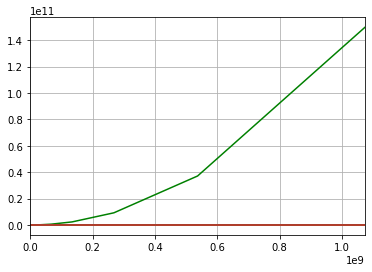

In [140]:
plt.plot(n, insert_sort_t1,color='green', label='Insertion Sort')
plt.plot(n,merge_sort_t1,color='red', label= 'merge sort')
plt.plot(n,quick_sort_t1,color='blue', label='quick sort')
plt.plot(n,counting_sort_t1,color='orange')
plt.plot(n,heap_sort_t1,color='brown')
plt.xlim((0,max(n)))
#plt.ylim((0,10000))
plt.grid(True)

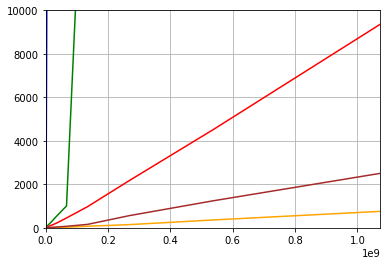

In [142]:
plt.plot(n, insert_sort_t2,color='green', label='Insertion Sort')
plt.plot(n,merge_sort_t2,color='red', label= 'merge sort')
plt.plot(n,quick_sort_t2,color='blue', label='quick sort')
plt.plot(n,counting_sort_t2,color='orange')
plt.plot(n,heap_sort_t2,color='brown')
plt.xlim((0,max(n)))
plt.ylim((0,10000))
plt.grid(True)